# 챗GPT 활용하여 출생 데이터 시각화하기
- 참고 유튜브 [김왼손의 왼손코딩](https://youtu.be/Z68qXQyGQj4?feature=shared)

## **[국가 통계 포털](https://kosis.kr/index/index.do)**을 이용하여 출생 데이터 확인하기

챗GPT에게 데이터를 시각화하는 파이썬 패키지 중 3가지를 설명해주고 그 중 초보자가 사용하기 쉬운 패키지를 선택해 달라고 요청함.

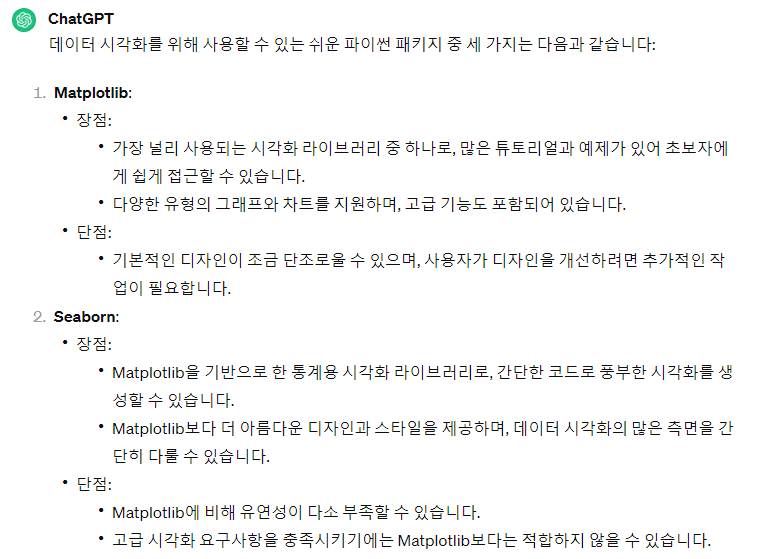

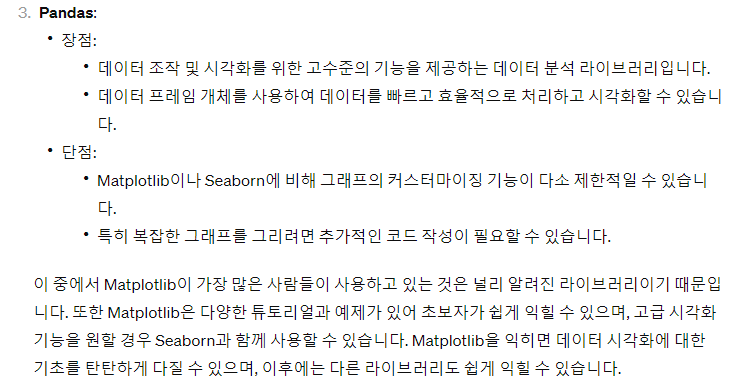

In [2]:
# 한글 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,532 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# 그래프 설정
# plt.figure(figsize=(20, 10), facecolor=None)
plt.rc('font' , family='NanumBarunGothic')

## CSV 패키지

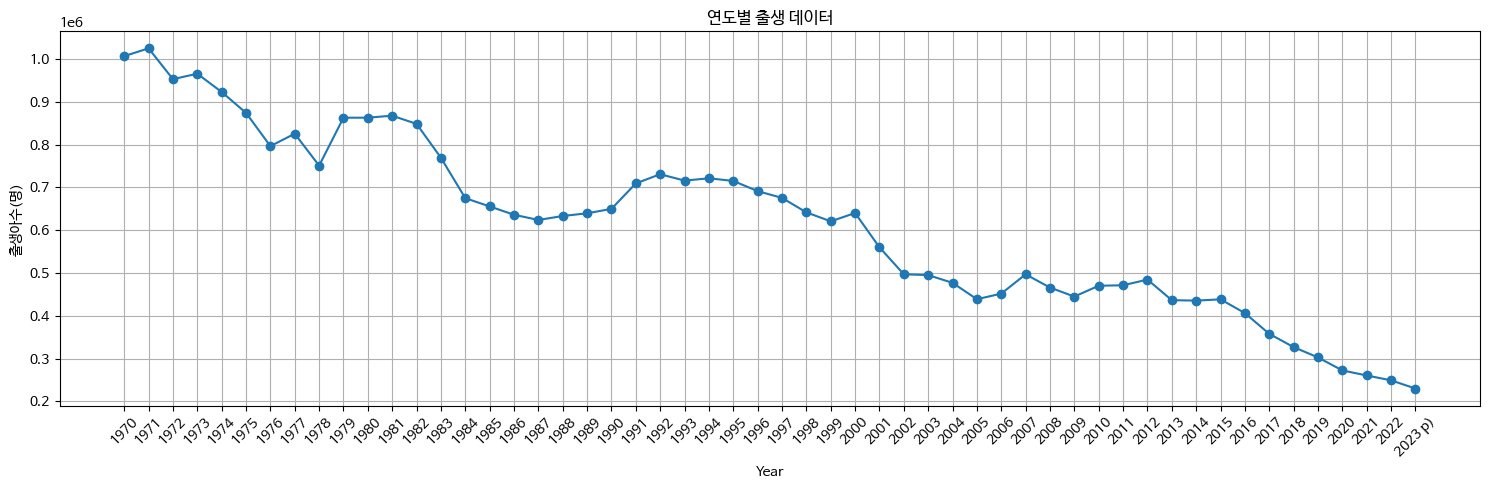

In [19]:
import csv

# csv 파일을 열어서 필요한 데이터를 가져옴
with open('/content/data.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)

    # 헤더를 건너뛰기 위해 next함수를 사용.
    header = next(reader)

    # 시점과 출생아수의 데이터를 저장하기 위한 리스트
    years = []
    births = []

    # csv 파일을 각 행을 순회하면서 시점과 출생아수의 데이터를 읽음
    for raw in reader:
        years.append(raw[0])    # 첫번쨰 열
        births.append(int(raw[1]))   # 두번째 열 출생아 수

# matplotlib을 이용해 2차원 꺽은선 차트 그리기.
plt.figure(figsize = (15,5)) # 차트 크기 설정
plt.plot(years, births, marker = 'o') # X,y 축
plt.title('연도별 출생 데이터')
plt.xlabel('Year')          # x축 라벨
plt.ylabel('출생아수(명)')  # y축 라벨
plt.xticks(rotation=45)     # x축 레이블의 회전 각도를 설정, 모든 레이블이 가독성 있게 보이도록 함.
plt.grid(True)
plt.tight_layout()
plt.show()

## 판다스 패키지


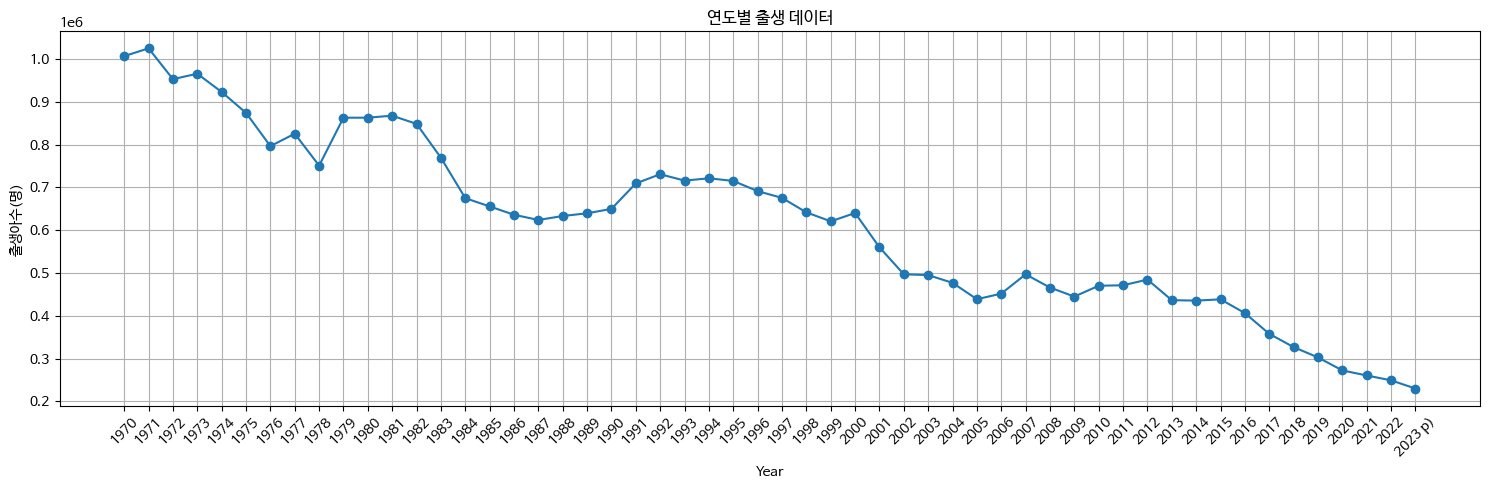

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일을 pandas DataFrame으로 읽어오기
df = pd.read_csv('/content/data.csv')

# 시점과 출생아수 데이터 추출
years = df['시점']
births = df['출생아수(명)']

# 2차원 꺾은선 그래프 그리기
plt.figure(figsize=(15, 5))  # 차트 크기 설정
plt.plot(years, births, marker='o')  # X, y 축
plt.title('연도별 출생 데이터')
plt.xlabel('Year')  # x축 라벨
plt.ylabel('출생아수(명)')  # y축 라벨
plt.xticks(rotation=45)  # x축 레이블의 회전 각도를 설정하여 모든 레이블이 가독성 있게 보이도록 함
plt.grid(True)
plt.tight_layout()
plt.show()

## 1e6 생소할 수 있음 (1뒤에 0이 6개)
천단위로 표시

    FuncFormatter를 사용하여 y축의 숫자를 실제 값으로 표시
    format_func 함수를 정의하여 숫자를 천 단위로 구분하여 표시하도록 설정
    FuncFormatter에 적용하여 y축의 형식을 지정

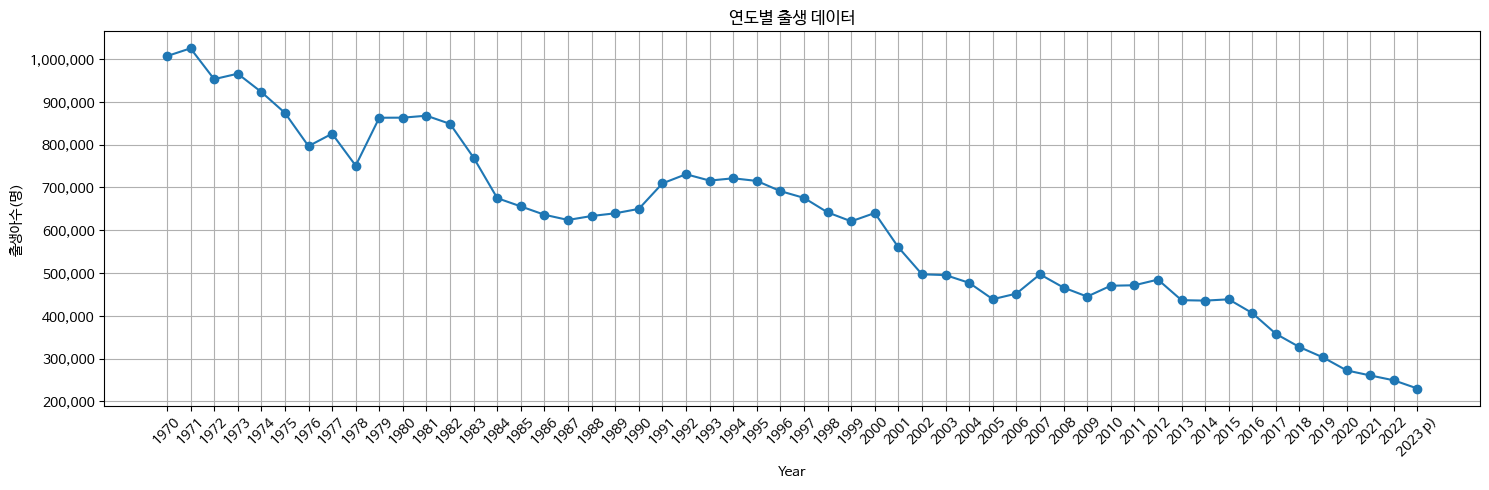

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# CSV 파일을 pandas DataFrame으로 읽어오기
df = pd.read_csv('/content/data.csv')

# 시점과 출생아수 데이터 추출
years = df['시점']
births = df['출생아수(명)']

# 2차원 꺾은선 그래프 그리기
plt.figure(figsize=(15, 5))  # 차트 크기 설정
plt.plot(years, births, marker='o')  # X, y 축
plt.title('연도별 출생 데이터')
plt.xlabel('Year')  # x축 라벨
plt.ylabel('출생아수(명)')  # y축 라벨

# y축에 대한 형식 지정 함수 정의
def format_func(value, tick_number):
    return f'{int(value):,}'  # 숫자를 천 단위로 구분하여 표시

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))  # y축 형식 지정 함수 적용

plt.xticks(rotation=45)  # x축 레이블의 회전 각도를 설정하여 모든 레이블이 가독성 있게 보이도록 함
plt.grid(True)
plt.tight_layout()
plt.show()
